In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import cv2
import skimage
from skimage import data, io


This notebook is a continuation of the first part of the image_classification notebook, which contains majority of the exploratory analysis that has taken place. This part of the notebook will focus on determining how the image features differ between classes and decide whether more features need to be created/added to the exisiting dataframe.

**NOTE**: I was trying to save my previous dataframe into a csv file, but it turns out that in doing so, the formatting of the pictures array was messed-up (i.e. turned into strings). I couldn't find a very effective way of reverting the formatting, so instead, I've decided to re-read the image files and append the relavant columns/features from the previous dataframe together. In the future, I will probably figure out a better way of doing things, but for now, (since this is suppose to be a learning experience), the current procedures will suffice. 

In [2]:
#importing previous functions to read in files again

In [3]:
from os import listdir
from os.path import isfile, join
import cv2

def read_organize_data(file_path):
    #Fill this function out, should return a dataframe with picture object, and correct encoding
    ''' Input: file_path 
                Takes in a file path for training data ONLY, 
                cuz file/folder formatting difference as compared to test data
        
        Returns: A list of lists, where each inner list represents each individual folder, 
                and thus each individual folder (or inner list) holds the array matrices 
                for all the images/pictures within that folder
    '''
    
    pic_files = [ f for f in listdir(file_path)] # "list" out all the files/images within the directory    
    collection = []

    for i in range(1, len(pic_files)): #cuz index 0 is DS.store
        
        folder_path = join(file_path, pic_files[i]) 
        full_img_path = [join(folder_path, img) for img in listdir(folder_path)]
        
        temp = []
        for k in range(len(full_img_path)): 
            img_matrix = io.imread(full_img_path[k])
            temp.append(img_matrix)
            
        collection.append(temp)
    
    
    return collection

#----------------------------------------------------------------------------------------------------------------

def make_dataframe(all_folders):
    ''' Takes in a list of lists where each inner list represents an individual folder 
        which holds all the picture array matrices of that folder
        
        Returns a dataframe where "encoding" represents the specific folder, and 
        each row under the "pictures" column represents an indivdual image belonging to the encoded folder
    '''
    li = []
    
    for k in range(len(all_folders)): 
        folder = all_folders[k]
        
        # NOTE: means that folders with no images are not included in df
        if len(folder) != 0: #folder is not empty 
            for i in range(len(folder)):
#             for i in range(3): #to test small samples
                d = {"pictures": folder[i]}
                encoding = {"encoding": k} 
                
                d.update(encoding)
                li.append(d)
                
    df = pd.DataFrame(li)
    return df

#----------------------------------------------------------------------------------------------------------------

def read_test_data(test_file_path): 
    #code courtesy of https://stackoverflow.com/questions/33369832/read-multiple-images-on-a-folder-in-opencv-python/43049639

    ''' Takes in the file path of test set ONLY,
    
        Returns a list of image array matrices for each image
        in the directory file
    '''
    onlyfiles = [f for f in listdir(test_file_path) if isfile(join(test_file_path, f))]
    images = np.empty(len(onlyfiles), dtype=object)
    for n in range(0, len(onlyfiles)):
        images[n] = cv2.imread(join(test_file_path, onlyfiles[n]))
        
    return images

In [4]:
#training data
starting_data = read_organize_data("20_categories_training/")
training_df = make_dataframe(starting_data)
training_df.head()

,encoding,pictures
0,1,"[[[75, 93, 79], [34, 52, 38], [27, 48, 33], [2..."
1,1,"[[[231, 205, 188], [228, 180, 144], [217, 179,..."
2,1,"[[[255, 252, 249], [255, 252, 249], [255, 253,..."
3,1,"[[[173, 166, 160], [175, 168, 162], [178, 171,..."
4,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [5]:
#testing data
test_starting_data = read_test_data("20_Validation/")
test_df = make_dataframe([test_starting_data]) #had to encase test_starting data so that it'll be a list of list 
test_df.head()

,encoding,pictures
0,0,"[[[74, 79, 80], [50, 55, 56], [48, 53, 54], [4..."
1,0,"[[[85, 173, 213], [85, 173, 213], [85, 173, 21..."
2,0,"[[[30, 36, 19], [25, 31, 14], [21, 26, 11], [2..."
3,0,"[[[69, 138, 95], [69, 138, 95], [69, 138, 95],..."
4,0,"[[[242, 204, 162], [242, 203, 164], [242, 203,..."


Notice how the columns (especially the "pictures") columns looks like, and the dtypes. Because of the erroneous formatting, I'm going to replace the pictures column with the "pictures" columnn from the training set. This also means that I will have to resplit my training and testing set beforehand (at least until I figure out how to revert/fix the formating for the picture images). 

Note: Using the same random_state seed should produce the same random sequence of rows/pictures for the training set and the validation set, so it should be fine to manipulate in this way.

In [7]:
from sklearn.model_selection import train_test_split

#42 to generate the same pseudo-rand sequence everytime it runs
train, val = train_test_split(training_df, test_size=0.1, random_state=42)

In [11]:
training_df = train

In [12]:
train_csv = pd.read_csv("exported_training.csv")
train_csv.head()

,encoding,pictures,shape,size,type,avg_blue,avg_green,avg_red,dom_color,aspect_ratio
0,14,[[[ 26 19 50]\n [ 26 19 50]\n [ 29 20 ...,"(655, 440, 3)",864600,color,140.312755,137.023931,129.614445,"[236.29123435939545, 229.34941918580455, 190.9...","(88.0, 131.0)"
1,14,[[[ 53 89 28]\n [ 62 102 42]\n [ 52 91 ...,"(976, 1301, 3)",3809328,color,115.448912,115.112264,92.376852,"[68.5619909502148, 66.62239819005217, 46.54917...","(1301.0, 976.0)"
2,3,[[[50 54 53]\n [54 58 57]\n [58 62 61]\n .....,"(200, 151, 3)",90600,color,39.404735,43.188742,40.581093,"[31.168270137711442, 33.979689366786985, 34.00...","(151.0, 200.0)"
3,6,[[[150 202 226]\n [150 202 226]\n [150 202 2...,"(326, 328, 3)",320784,color,132.903776,172.298388,196.274727,"[166.83636128948234, 206.26625576816235, 224.8...","(164.0, 163.0)"
4,1,[[[ 6 5 3]\n [ 6 5 3]\n [ 6 5 ...,"(337, 382, 3)",386202,color,114.541077,104.983291,74.854056,"[122.69572353424392, 111.23224218109345, 78.07...","(382.0, 337.0)"


In [13]:
train_csv.dtypes

encoding          int64
pictures         object
shape            object
size              int64
type             object
avg_blue        float64
avg_green       float64
avg_red         float64
dom_color        object
aspect_ratio     object
dtype: object

In [14]:
train_csv["pictures"] = training_df["pictures"].values
train_csv.head()

,encoding,pictures,shape,size,type,avg_blue,avg_green,avg_red,dom_color,aspect_ratio
0,14,"[[[26, 19, 50], [26, 19, 50], [29, 20, 51], [3...","(655, 440, 3)",864600,color,140.312755,137.023931,129.614445,"[236.29123435939545, 229.34941918580455, 190.9...","(88.0, 131.0)"
1,14,"[[[53, 89, 28], [62, 102, 42], [52, 91, 34], [...","(976, 1301, 3)",3809328,color,115.448912,115.112264,92.376852,"[68.5619909502148, 66.62239819005217, 46.54917...","(1301.0, 976.0)"
2,3,"[[[50, 54, 53], [54, 58, 57], [58, 62, 61], [5...","(200, 151, 3)",90600,color,39.404735,43.188742,40.581093,"[31.168270137711442, 33.979689366786985, 34.00...","(151.0, 200.0)"
3,6,"[[[150, 202, 226], [150, 202, 226], [150, 202,...","(326, 328, 3)",320784,color,132.903776,172.298388,196.274727,"[166.83636128948234, 206.26625576816235, 224.8...","(164.0, 163.0)"
4,1,"[[[6, 5, 3], [6, 5, 3], [6, 5, 3], [6, 5, 3], ...","(337, 382, 3)",386202,color,114.541077,104.983291,74.854056,"[122.69572353424392, 111.23224218109345, 78.07...","(382.0, 337.0)"


In [15]:
#doing the same with the testing dataset
test_csv = pd.read_csv("exported_testing.csv")
test_csv.head()

,pictures
0,[[[ 74 79 80]\n [ 50 55 56]\n [ 48 53 ...
1,[[[ 85 173 213]\n [ 85 173 213]\n [ 85 173 2...
2,[[[ 30 36 19]\n [ 25 31 14]\n [ 21 26 ...
3,[[[ 69 138 95]\n [ 69 138 95]\n [ 69 138 ...
4,[[[242 204 162]\n [242 203 164]\n [242 203 1...


In [16]:
test_csv["pictures"] = test_df["pictures"].values
test_csv.head()

,pictures
0,"[[[74, 79, 80], [50, 55, 56], [48, 53, 54], [4..."
1,"[[[85, 173, 213], [85, 173, 213], [85, 173, 21..."
2,"[[[30, 36, 19], [25, 31, 14], [21, 26, 11], [2..."
3,"[[[69, 138, 95], [69, 138, 95], [69, 138, 95],..."
4,"[[[242, 204, 162], [242, 203, 164], [242, 203,..."


# Feature Exploration 

(i.e. Figuring out how to differentiate between classes or encodings for each animal group)

In [17]:
train_csv.head()

,encoding,pictures,shape,size,type,avg_blue,avg_green,avg_red,dom_color,aspect_ratio
0,14,"[[[26, 19, 50], [26, 19, 50], [29, 20, 51], [3...","(655, 440, 3)",864600,color,140.312755,137.023931,129.614445,"[236.29123435939545, 229.34941918580455, 190.9...","(88.0, 131.0)"
1,14,"[[[53, 89, 28], [62, 102, 42], [52, 91, 34], [...","(976, 1301, 3)",3809328,color,115.448912,115.112264,92.376852,"[68.5619909502148, 66.62239819005217, 46.54917...","(1301.0, 976.0)"
2,3,"[[[50, 54, 53], [54, 58, 57], [58, 62, 61], [5...","(200, 151, 3)",90600,color,39.404735,43.188742,40.581093,"[31.168270137711442, 33.979689366786985, 34.00...","(151.0, 200.0)"
3,6,"[[[150, 202, 226], [150, 202, 226], [150, 202,...","(326, 328, 3)",320784,color,132.903776,172.298388,196.274727,"[166.83636128948234, 206.26625576816235, 224.8...","(164.0, 163.0)"
4,1,"[[[6, 5, 3], [6, 5, 3], [6, 5, 3], [6, 5, 3], ...","(337, 382, 3)",386202,color,114.541077,104.983291,74.854056,"[122.69572353424392, 111.23224218109345, 78.07...","(382.0, 337.0)"


In [18]:
rgb_grouped = train_csv[["avg_blue", "avg_green", "avg_red", "encoding"]].groupby("encoding").agg(np.mean)
rgb_grouped

,avg_blue,avg_green,avg_red
encoding,,,
1,124.548577,122.898976,108.388901
2,128.506553,129.463413,137.024273
3,47.017216,41.820547,51.637286
4,129.839252,117.219844,104.550355
5,135.025091,126.484400,115.074721
6,86.988138,117.549672,141.398643
7,129.146411,127.397554,112.955884
8,119.431656,118.896432,111.012250
9,98.451158,102.004492,88.177967


**Remember**:

0=Airplanes, 1=Bear, 2=Blimp, 3=Comet, 4=Crab, 5=Dog, 6=Dolphin, 7=Giraffe, 8=Goat, 9=Gorilla, 10=Kangaroo, 11=Killer-Whale, 12=Leopards, 13=Llama, 14= Penguin, 15= Porcupine, 16=Teddy-Bear, 17=Triceratops, 18=Unicorn, 19=Zebra

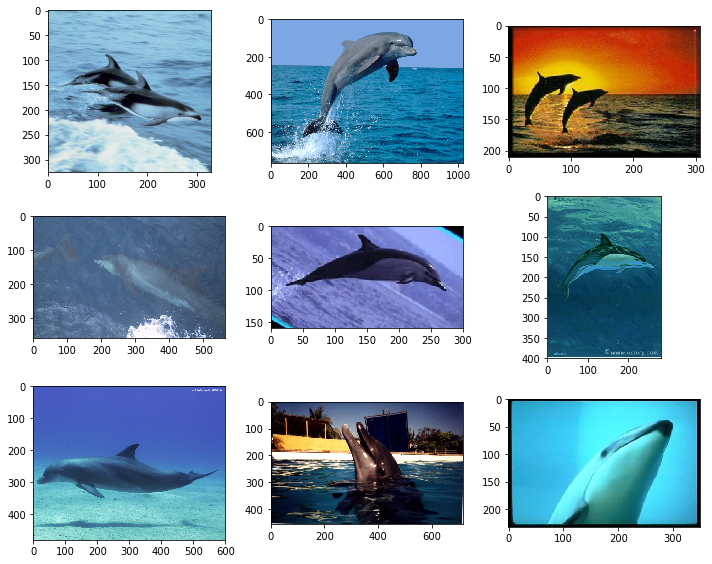

In [25]:
fig, ax = plt.subplots(3, 3, figsize=(10, 8))

row = 0
col = 0
for i in np.arange(9):
    ax[row, col].imshow(train_csv[train_csv["encoding"] == 6].iloc[i]["pictures"])
    col += 1
    if col >=3: 
        col = 0
        row += 1

plt.tight_layout() #just to see visually 

It's also interesting that an image like the one shown below is also classified as a dolphin! I don't necessarily see it, but perhaps it is? Or is it?

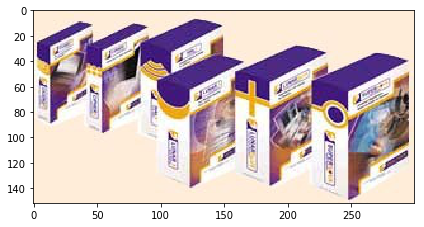

In [26]:
skimage.io.imshow(train_csv[train_csv["encoding"] == 6].iloc[13]["pictures"])

In [27]:
train_csv["dom_color"][0]

'[236.29123435939545, 229.34941918580455, 190.92751025477398]'

In [28]:
import ast
x = ast.literal_eval(train_csv["dom_color"][0])
x

[236.29123435939545, 229.34941918580455, 190.92751025477398]

In [29]:
type(x)

list

In [30]:

def avg_dom(arr): 
    red = []
    blue = []
    green = []
    
    for x in arr:
        if x != "grayscale":
            x = ast.literal_eval(x)
            r = red.append(x[0])
            g = green.append(x[1])
            b = blue.append(x[2])
            
    return np.mean(red), np.mean(green), np.mean(blue)
    

In [85]:
for i in range(19): 
    print(i + 1, "|", avg_dom(train_csv[["encoding", "dom_color"]].groupby("encoding").agg(list).iloc[i][0]))

1 | (117.11421443205741, 117.51360944018423, 105.54624782641821)
2 | (129.0451633541723, 135.16596925278134, 149.35314741436838)
3 | (47.77222699283549, 40.81240532323298, 53.16799493979512)
4 | (125.18283428715019, 114.86310019710571, 103.88200937985472)
5 | (136.82106177785616, 128.14680415491185, 116.3457387857757)
6 | (87.54221888467214, 120.67867298704196, 149.3304289796267)
7 | (129.0737237066732, 129.77536040592273, 117.58083378366965)
8 | (100.682979431736, 101.98247227781039, 94.48618130728012)
9 | (73.44643937696466, 75.73533799704951, 64.81407051012152)
10 | (119.39972493806698, 119.63664986276721, 95.75268915000203)
11 | (83.62343141613613, 110.94975735153758, 138.35523077284086)
12 | (95.98861627473342, 96.68050943110366, 68.35065969937844)
13 | (109.29082837979601, 105.11572217294034, 89.17373464094327)
14 | (110.26353667752957, 117.67554241259495, 116.68735552610215)
15 | (108.02618494992014, 103.45867453234418, 92.67634873778417)
16 | (169.34174848633984, 155.6624632550

Honestly, in comparison, there's not too much of a difference between the average dominant color for each encoding and the average r, g, b values in the column features. (AND it turns out that I may have mislabeled the rgb columns! The blue and red columns below should be switched)

In [32]:
rgb_grouped.rename(columns={"avg_blue": "avg_red", "avg_red": "avg_blue"}, inplace=True)

In [33]:
rgb_grouped

,avg_red,avg_green,avg_blue
encoding,,,
1,124.548577,122.898976,108.388901
2,128.506553,129.463413,137.024273
3,47.017216,41.820547,51.637286
4,129.839252,117.219844,104.550355
5,135.025091,126.484400,115.074721
6,86.988138,117.549672,141.398643
7,129.146411,127.397554,112.955884
8,119.431656,118.896432,111.012250
9,98.451158,102.004492,88.177967


Now, I'm going to sort by each color average and use this to help figure/categorize each animal class. (e.g. if a pictures r value is less than 60 or so, then it'll be more likely to be in ____ group.)

In [87]:
#code to display dataframes side by side
from IPython.display import display, HTML

CSS = """
div.cell:nth-child(33) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [88]:
display(rgb_grouped.sort_values("avg_red")[["avg_red"]])
display(rgb_grouped.sort_values("avg_green")[["avg_green"]])
display(rgb_grouped.sort_values("avg_blue")[["avg_blue"]])

,avg_red
encoding,
3,47.017216
6,86.988138
11,91.109501
9,98.451158
12,104.946058
14,118.081743
15,118.376891
8,119.431656
10,122.927408


,avg_green
encoding,
3,41.820547
12,101.696647
9,102.004492
15,114.099799
11,114.569619
4,117.219844
6,117.549672
13,117.580604
8,118.896432


,avg_blue
encoding,
3,51.637286
12,70.503447
9,88.177967
10,98.839952
13,101.585889
15,103.751130
4,104.550355
19,106.432111
1,108.388901


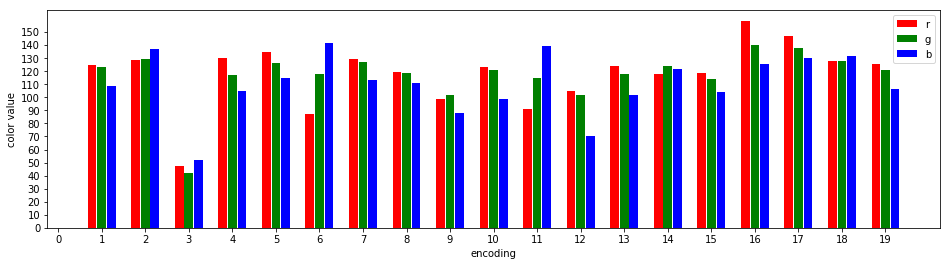

In [89]:
plt.figure(figsize=(16, 4))

x = rgb_grouped.index
y_red = rgb_grouped["avg_red"]
y_green = rgb_grouped["avg_green"]
y_blue = rgb_grouped["avg_blue"]

w = 0.22
plt.bar(x - w, y_red, width=0.2, color="red")
plt.bar(x, y_green, width=0.2, color="green")
plt.bar(x + w, y_blue, width=0.2, color="blue")
plt.xticks(np.arange(20));
plt.yticks(np.arange(0, 160, 10))
plt.legend(["r", "g", "b"]);
plt.xlabel("encoding")
plt.ylabel("color value");

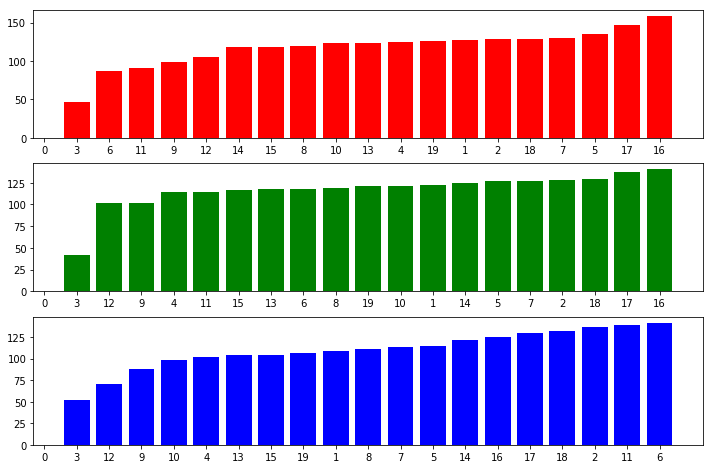

In [90]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8))

ax[0].bar(x, rgb_grouped.sort_values("avg_red")["avg_red"], color="r")
orig = np.arange(20)
ax[0].set_xticks(orig);
ax[0].set_xticklabels([0, 3, 6, 11, 9, 12, 14, 15, 8, 10, 13, 4, 19, 1, 2, 18, 7, 5, 17, 16]);


ax[1].bar(x, rgb_grouped.sort_values("avg_green")["avg_green"], color="g")
orig = np.arange(20)
ax[1].set_xticks(orig);
ax[1].set_xticklabels([0, 3, 12, 9, 4, 11, 15, 13, 6, 8, 19, 10, 1, 14, 5, 7, 2, 18, 17, 16]);


ax[2].bar(x, rgb_grouped.sort_values("avg_blue")["avg_blue"], color="b")
orig = np.arange(20)
ax[2].set_xticks(orig);
ax[2].set_xticklabels([0, 3, 12, 9, 10, 4, 13, 15, 19, 1, 8, 7, 5, 14, 16, 17, 18, 2, 11, 6]);



In [91]:
rgb_grouped.sort_values("avg_blue").index

Int64Index([3, 12, 9, 10, 13, 15, 4, 19, 1, 8, 7, 5, 14, 16, 17, 18, 2, 11, 6], dtype='int64', name='encoding')

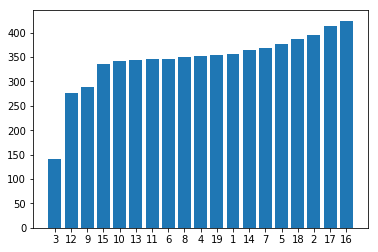

In [92]:
data = pd.DataFrame({"encoding": np.arange(1, 20),"sum_avgs": [sum(x) for x in rgb_grouped.values]}).sort_values("sum_avgs")
labels = data["encoding"].values
plt.bar(np.arange(19), data["sum_avgs"])
plt.xticks(np.arange(19), labels);

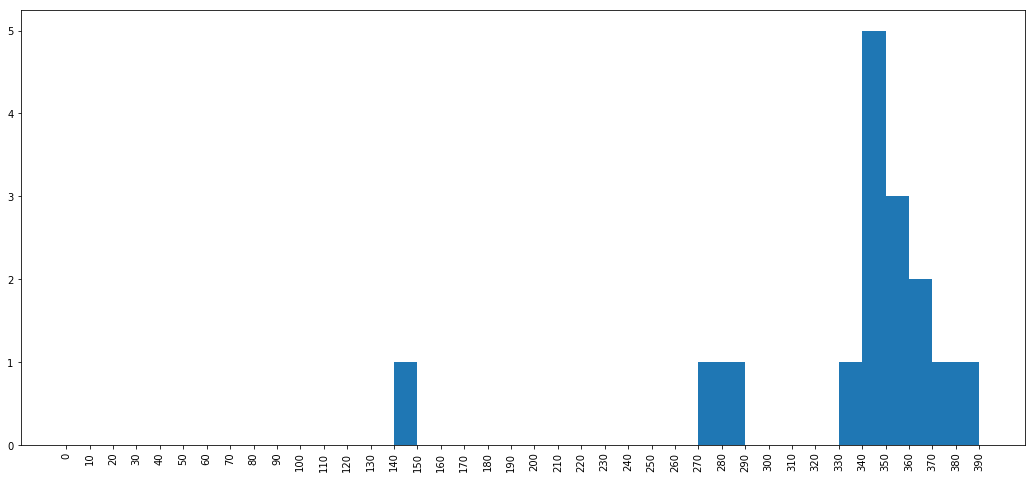

In [96]:
plt.figure(figsize=(18, 8))
plt.hist("sum_avgs", data=data, bins = np.arange(0,400,10));
plt.xticks(np.arange(0, 400, 10), rotation=90);

Simply looking at these features, we can start determining how to differentiate between animal classes: 

1. The "3" encoding has low color values overall for all three r, g, b values
2. The "16" encoding has the highest average r value (high 150s to 160) and g value (around 140)

Other insights: 
1. 6 and 11 are relatively similar in terms of rgb values (will need to use something else to determine between the two -- Dolphins and Killer Whales)
2. 12 and 9 have around the same overall sum average for its rgb colors (in comparison to the other animal groups), but you can differentiate them since 9 and 12 have a large difference (that is distinguishable) for their blue value (where 9 has a greater blue value)
3. 17 and 16 are overall the highest in rgb sum average values (and their respective rgb values can be quite similar)

In [97]:
train_csv.head()

,encoding,pictures,shape,size,type,avg_blue,avg_green,avg_red,dom_color,aspect_ratio
0,14,"[[[26, 19, 50], [26, 19, 50], [29, 20, 51], [3...","(655, 440, 3)",864600,color,140.312755,137.023931,129.614445,"[236.29123435939545, 229.34941918580455, 190.9...","(88.0, 131.0)"
1,14,"[[[53, 89, 28], [62, 102, 42], [52, 91, 34], [...","(976, 1301, 3)",3809328,color,115.448912,115.112264,92.376852,"[68.5619909502148, 66.62239819005217, 46.54917...","(1301.0, 976.0)"
2,3,"[[[50, 54, 53], [54, 58, 57], [58, 62, 61], [5...","(200, 151, 3)",90600,color,39.404735,43.188742,40.581093,"[31.168270137711442, 33.979689366786985, 34.00...","(151.0, 200.0)"
3,6,"[[[150, 202, 226], [150, 202, 226], [150, 202,...","(326, 328, 3)",320784,color,132.903776,172.298388,196.274727,"[166.83636128948234, 206.26625576816235, 224.8...","(164.0, 163.0)"
4,1,"[[[6, 5, 3], [6, 5, 3], [6, 5, 3], [6, 5, 3], ...","(337, 382, 3)",386202,color,114.541077,104.983291,74.854056,"[122.69572353424392, 111.23224218109345, 78.07...","(382.0, 337.0)"


In [100]:
ast.literal_eval(train_csv["aspect_ratio"].values[0])

(88.0, 131.0)